In [1]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.size']=14

In [3]:
def get_mass_profile(f):
    file = h5py.File(f, 'r')

    Subhalo=file.get('Subhalo')
    SubhaloMass=np.array(Subhalo['SubhaloMass'])
    SubhaloMass=10**10*SubhaloMass #converting to solar masses

    a=min(SubhaloMass)/2
    Mass_Bins=[]
    i=1
    while a<max(SubhaloMass):
        Mass_Bins.append(a)
        a=np.power(2,i/2)*min(SubhaloMass)
        i=i+1

    i=0
    j=0
    N_halo=[]
    for mbin in Mass_Bins:
        N_halo.append( (SubhaloMass > mbin).sum() )
    return Mass_Bins, N_halo

In [4]:
def get_mvel_profile(f):
    file = h5py.File(f, 'r')

    Subhalo=file.get('Subhalo') #Subhalo is the group, SubhaloVMas is the dataset inside the group
    SubhaloVMax=np.array(Subhalo['SubhaloVmax']) #km/s

    #Take Absolute Values of the velocities

    MaxVel=np.absolute(SubhaloVMax)

    #Gotta Create a maximum velocity bin

    a=0.5*min(MaxVel)
    MaxVel_Bin=[]
    while a<max(MaxVel):
        MaxVel_Bin.append(a)
        a=np.power(a,1.01)+a/5

    #Doing the magic here

    N_halo=[]
    i=0
    k=0
    for vbin in MaxVel_Bin:
        N_halo.append( (MaxVel > vbin).sum() )
    return MaxVel_Bin, N_halo

In [5]:
path = '/home/ryan/Data/Data3/run_2cDM_L3N256_powerm2m2_sigma1/'
fname = 'fof_subhalo_tab_007.hdf5'

f = path + fname

an_mbins, an_m = get_mass_profile(f)

an_vbins, an_v = get_mvel_profile(f)

In [14]:
file = h5py.File(f, 'r')
Redshift=float("{:.2f}".format(file['Header'].attrs['Redshift']))
Boxsize=int((file['Header'].attrs['BoxSize']))

In [7]:
path = '/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_DM_power00_sigma1/'
fname = 'fof_subhalo_tab_007.hdf5'

f = path + fname

bn_mbins, bn_m = get_mass_profile(f)

bn_vbins, bn_v = get_mvel_profile(f)

In [8]:
path = '/home/ryan/Data/Data0/snaps/run_CDM_L3N256_lower_softening/'
fname = 'fof_subhalo_tab_007.hdf5'

f = path + fname

cn_mbins, cn_m = get_mass_profile(f)

cn_vbins, cn_v = get_mvel_profile(f)

In [9]:
path = '/home/ryan/Data/Data0/snaps/run_CDM_L3N256_DM_lower_softening/'
fname = 'fof_subhalo_tab_007.hdf5'

f = path + fname

dn_mbins, dn_m = get_mass_profile(f)

dn_vbins, dn_v = get_mvel_profile(f)

In [10]:
path = '/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_DM_power00_sigma1/'
fname = 'fof_subhalo_tab_007.hdf5'

f = path + fname

en_mbins, en_m = get_mass_profile(f)

en_vbins, en_v = get_mvel_profile(f)

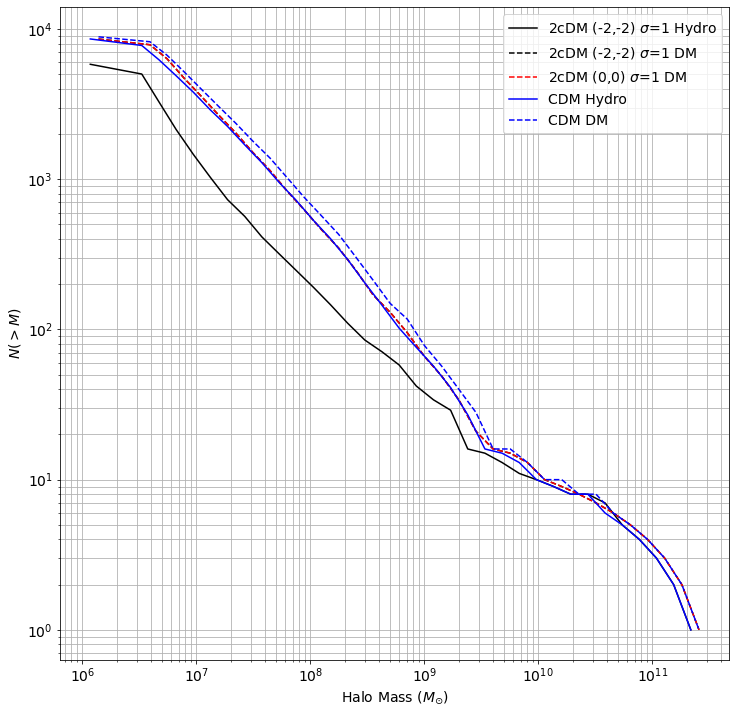

In [11]:
plt.figure(figsize=[12,12])
plt.plot(an_mbins, an_m, label="2cDM (-2,-2) $\sigma$=1 Hydro", color='k')
plt.plot(bn_mbins, bn_m, '--', label="2cDM (-2,-2) $\sigma$=1 DM", color='k')
plt.plot(en_mbins, en_m, '--', label="2cDM (0,0) $\sigma$=1 DM", color='r')
plt.plot(cn_mbins, cn_m, label="CDM Hydro", color='b')
plt.plot(dn_mbins, dn_m, '--', label="CDM DM", color='b')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid(True, which="both", ls="-")

#plt.title('SubHalo Mass Distribution L'+str(Boxsize)+', z= '+Redshift)
plt.xlabel("Halo Mass ($M_{\odot}$)")
plt.ylabel("$N\\left(>M\\right)$")


#output_filename=('SubHalo_Mass_Distribution_L'+str(Boxsize)+'_z_'+Redshift+'.png')
#plt.savefig(output_filename)
plt.show()

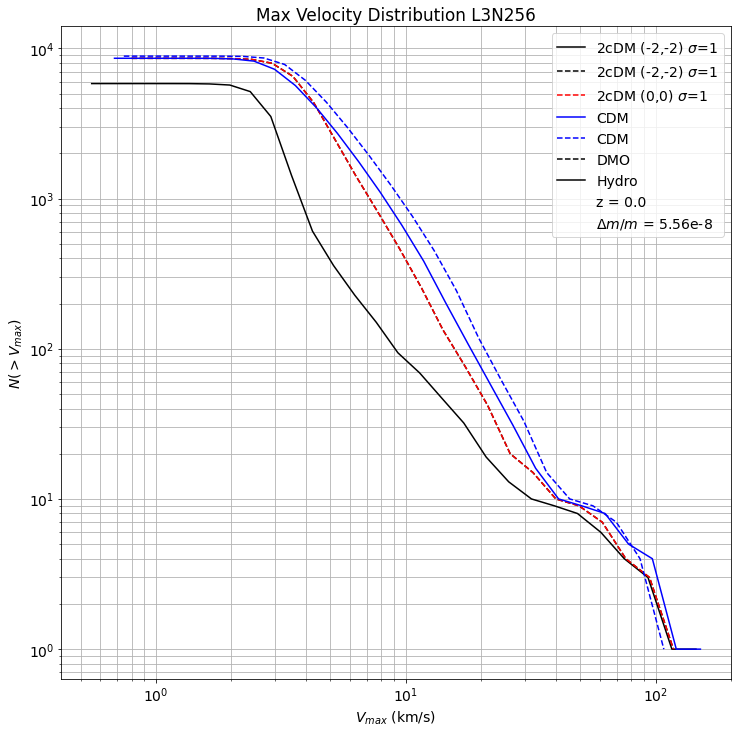

In [17]:
#plot Stuff
plt.figure(figsize=[12,12])
plt.plot(an_vbins, an_v, label="2cDM (-2,-2) $\sigma$=1", color='k')
plt.plot(bn_vbins, bn_v, '--', label="2cDM (-2,-2) $\sigma$=1", color='k')
plt.plot(en_vbins, en_v, '--', label="2cDM (0,0) $\sigma$=1", color='r')
plt.plot(cn_vbins, cn_v, label="CDM", color='b')
plt.plot(dn_vbins, dn_v, '--', label="CDM", color='b')
plt.yscale("log")
plt.xscale("log")

plt.plot([],[], '--', label='DMO', color='k')
plt.plot([],[], '-', label='Hydro', color='k')
plt.plot([],[], label='z = {}'.format(Redshift), alpha=0)
plt.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

plt.legend()
plt.grid(True, which="both", ls="-")

plt.title("Max Velocity Distribution L3N256")
plt.xlabel("$V_{max}$ (km/s)")
plt.ylabel("$N\\left(>V_{max}\\right)$")
plt.legend()

output_filename = 'MaxVelocityProfile_L'+str(Boxsize)+'_z_'+str(Redshift)+'.png'
plt.savefig(output_filename)

plt.show()